In [2]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import dynesty
from dynesty import plotting as dyplot
import pickle
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats

# Basic

In [70]:
def ln_prob(x):
    return np.sum(scipy.stats.norm(loc=0, scale=1).logpdf(x[:2]))

def prior_transform(u):
    res = np.zeros_like(u)
    res[:2] = (u[:2] - 0.5) * 5
    #res[2] = u[2]* 10#np.exp(2) * (u[2] - 0.5)
    return res

## Static

In [71]:
sampler = dynesty.NestedSampler(ln_prob, prior_transform, 3)

In [72]:
sampler.run_nested(maxcall=2000)

iter: 788 | +500 | bound: 0 | nc: 1 | ncall: 2508 | eff(%): 51.356 | loglstar:   -inf < -1.838 <    inf | logz: -3.227 +/-  0.010 | dlogz:  0.002 >  0.509                                            

In [73]:
sampler.results["logz"]

array([-14.60212751, -13.4926823 , -12.94853818, ...,  -3.23040208,  -3.22874074,  -3.22708127])

(<Figure size 1520x1520 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe790e0a2d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7920d6850>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe790ebdb10>],
        [<matplotlib.axes._subplots.AxesSubplot object at 0x7fe790cfeb10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe790c93250>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe790ccd350>],
        [<matplotlib.axes._subplots.AxesSubplot object at 0x7fe790c6c7d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe790c8cbd0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fe790c32f90>]], dtype=object))

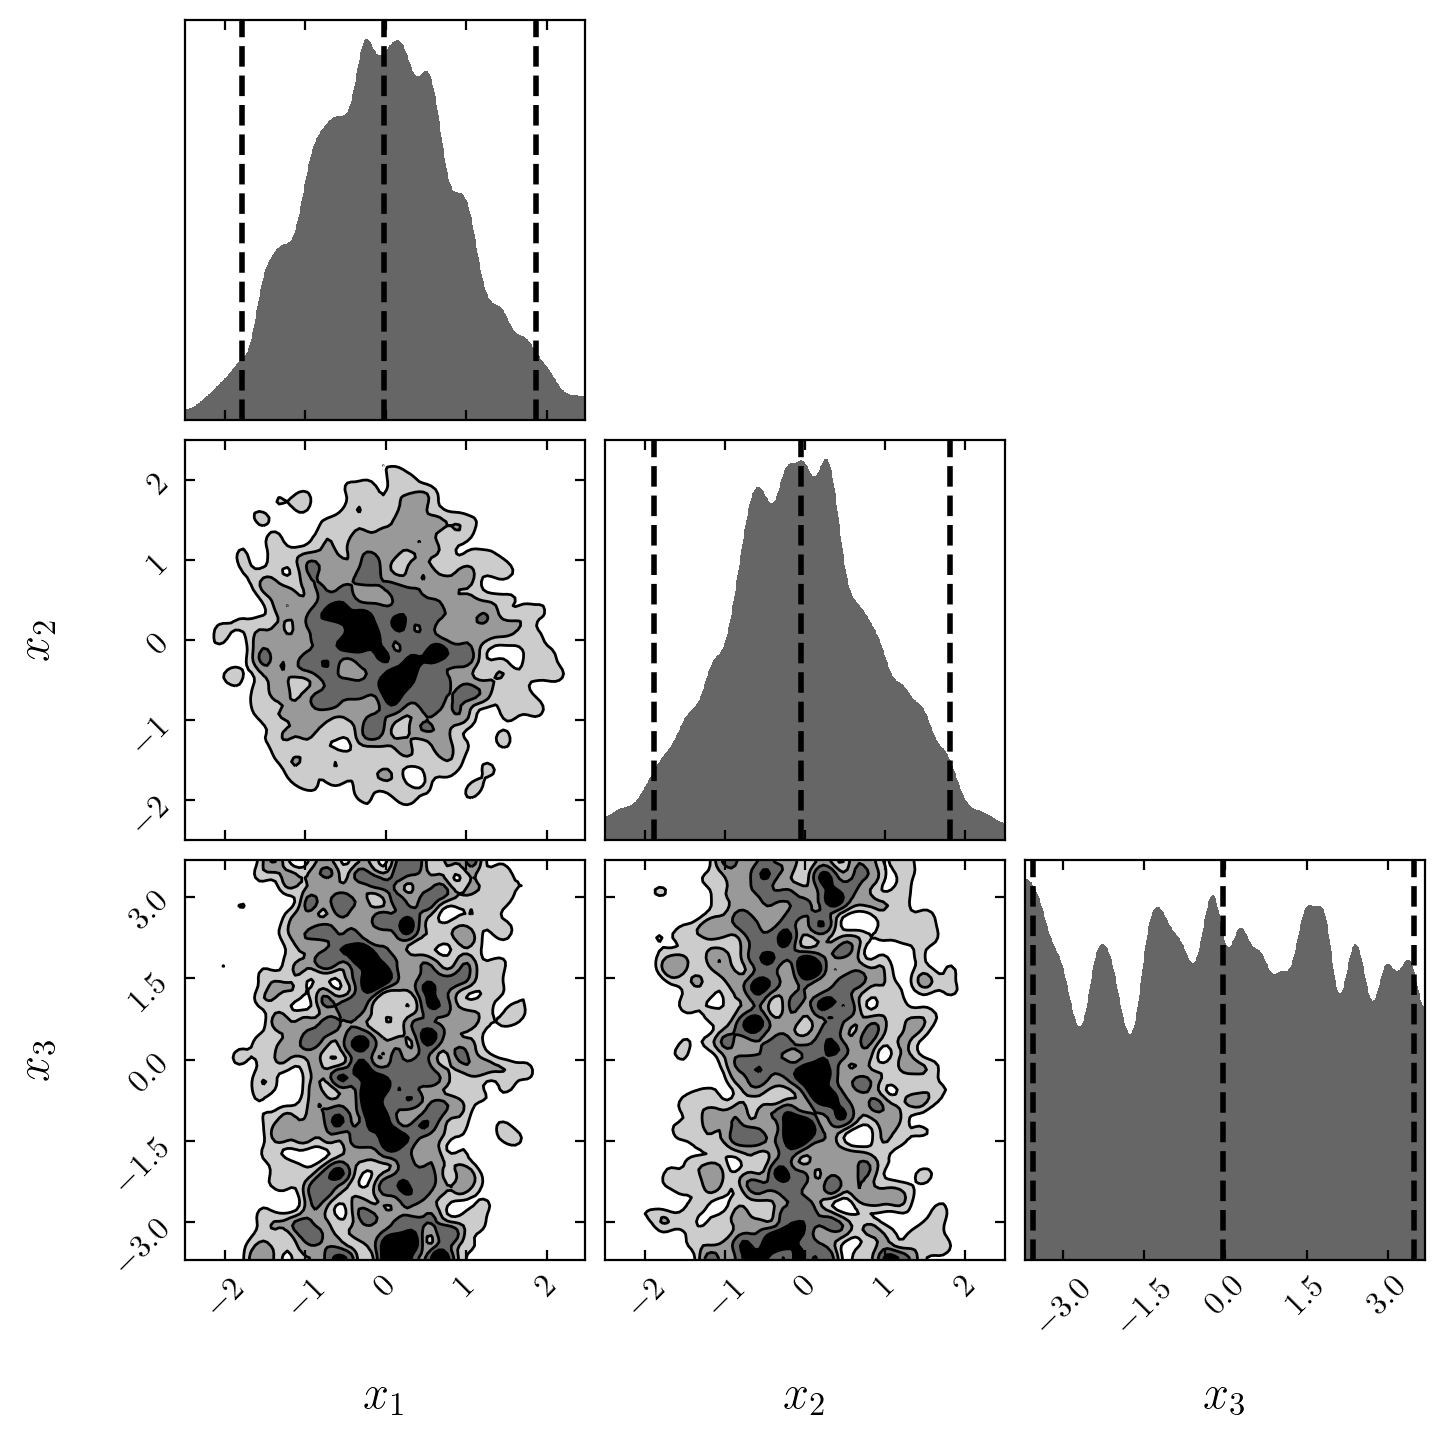

In [59]:
dyplot.cornerplot(sampler.results)

## Dynamic

### Initial run

In [153]:
dsampler = dynesty.DynamicNestedSampler(ln_prob, prior_transform, 2)

In [154]:
dsampler.run_nested(
    dlogz_init=0.01,
    nlive_init=50, # Base number of points
    nlive_batch=50, # Added number of points in each batch
    #maxcall=100
    maxbatch=5,
    use_stop=False,
)

iter: 913 | batch: 5 | bound: 11 | nc: 43 | ncall: 11436 | eff(%):  7.984 | loglstar: -5.789 < -1.857 < -2.690 | logz: -6.295 +/-  0.358 | stop:    nan                                               

In [155]:
f = open("res.pickle", "wb")
pickle.dump(dsampler.results, f)
f.close()

### Load run

In [156]:
f = open("res.pickle", "rb")
old_res = pickle.load(f)
type(old_res)

dynesty.results.Results

In [157]:
old_res.keys()

dict_keys(['niter', 'ncall', 'eff', 'samples', 'samples_id', 'samples_batch', 'samples_it', 'samples_u', 'samples_n', 'logwt', 'logl', 'logvol', 'logz', 'logzerr', 'information', 'batch_nlive', 'batch_bounds', 'bound', 'bound_iter', 'samples_bound', 'scale'])

In [158]:
old_res.logz[-1]

-6.213692103670413

(<Figure size 3200x3200 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8461cad0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7af08450>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7b81b7d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7af65ed0>], dtype=object))

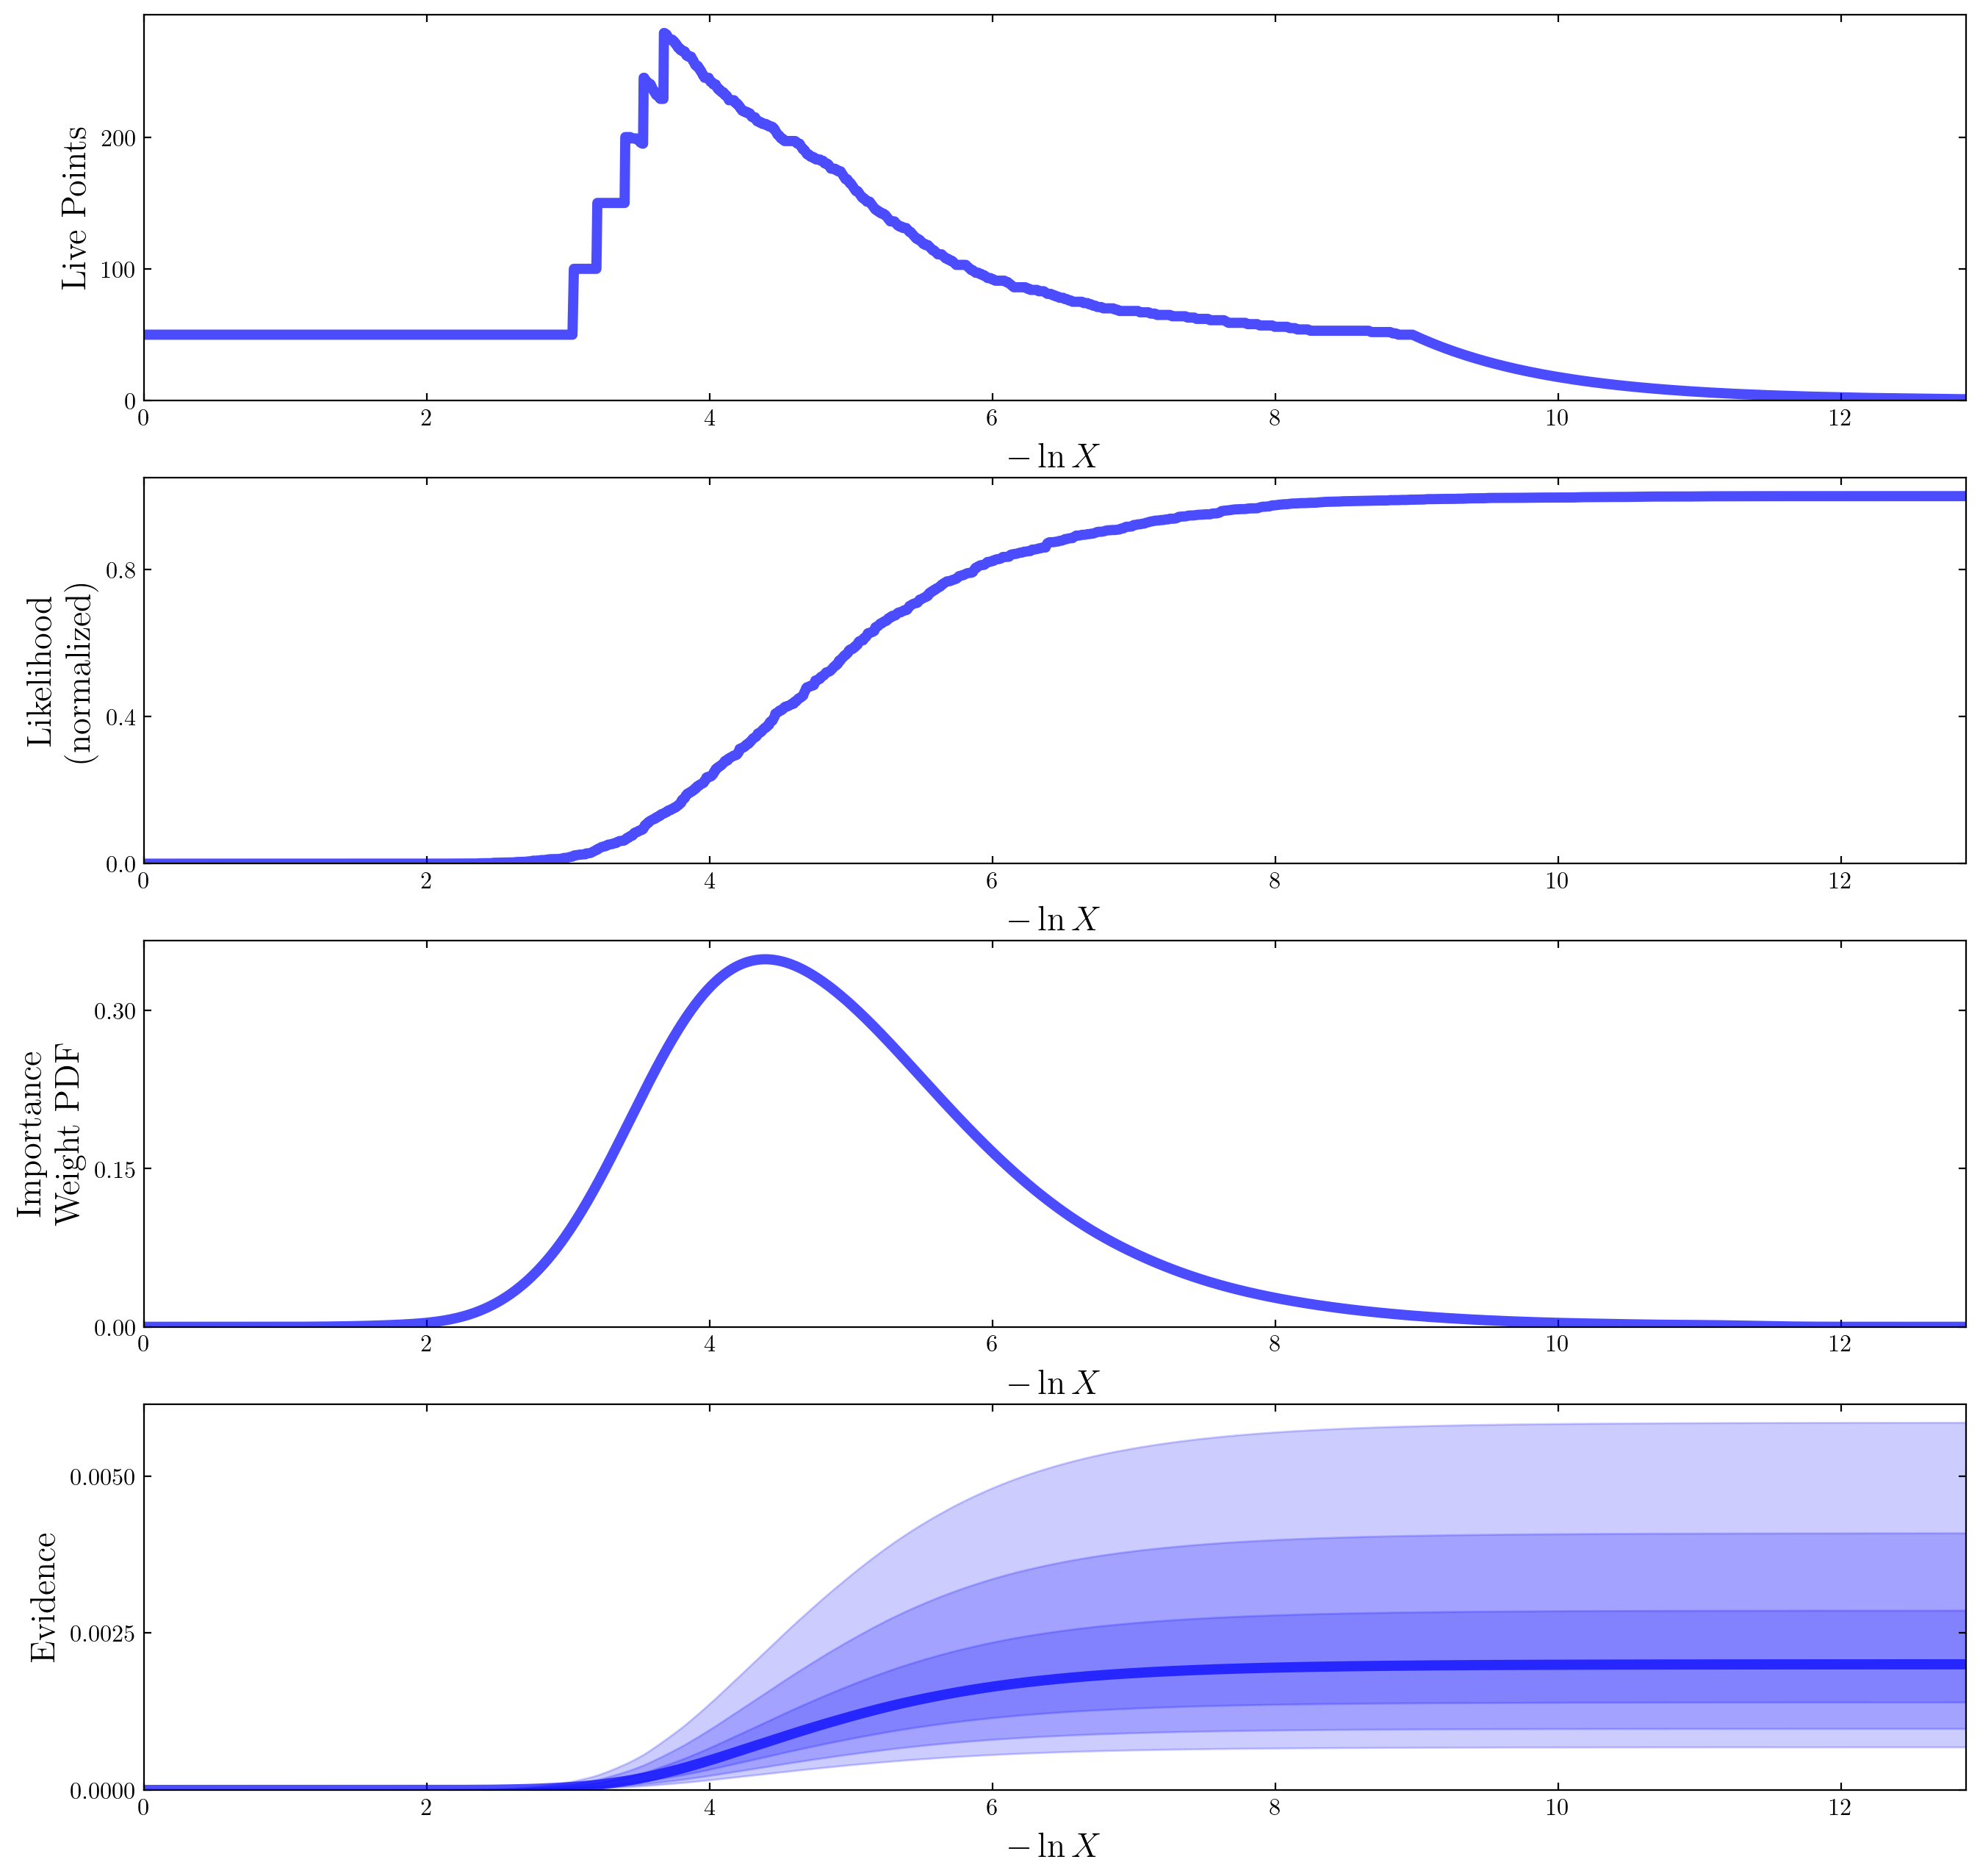

In [159]:
dyplot.runplot(old_res)

(<Figure size 1100x1100 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b824d2890>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b842b8ed0>],
        [<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b8464e550>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b847c7e10>]], dtype=object))

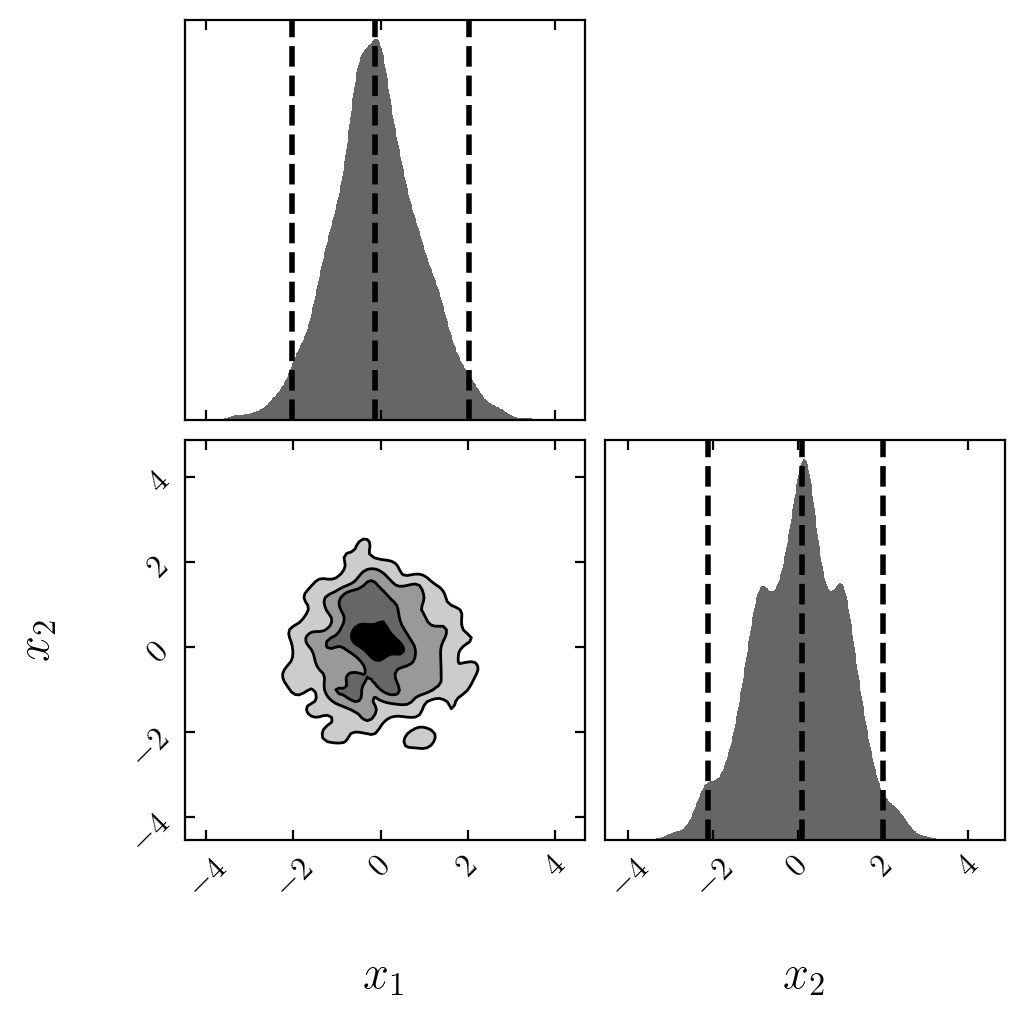

In [128]:
dyplot.cornerplot(dsampler.results)

### MCMC

In [139]:
samples = old_res.samples  # samples
weights = np.exp(old_res.logwt - old_res.logz[-1])

In [142]:
samples_equal = dynesty.utils.resample_equal(samples, weights)

TypeError: cannot unpack non-iterable PathCollection object

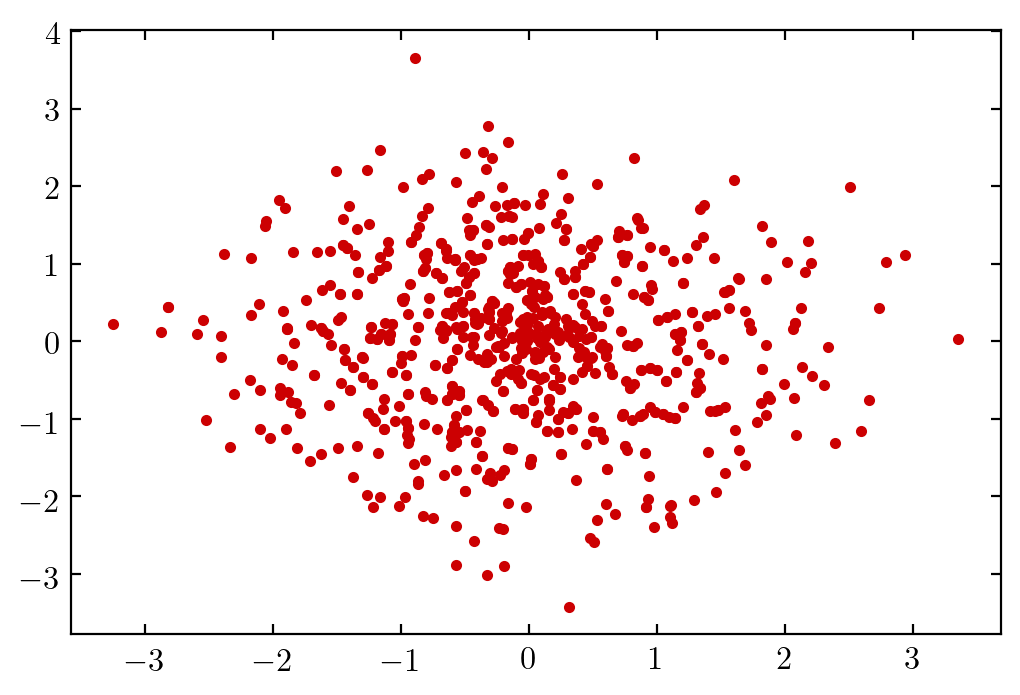

In [148]:
_, ax = plt.scatter(samples_equal[:,0], samples_equal[:,1])